# Edge detection Algorithms

<div style="text-align: center;">
    Víctor Vega Sobral
</div>

In this notebook, I´ll implement the canny edge detection algorithm to three different images of Formula 1 cars. The content of the notebook will be: 

* Define the code of the algorithm.
* Apply it to the three different images.
* Experiment with the parameters to see the different results.
* Analysis and conclussions with:
    - Quality of detected edges.
    - Computational performance (execution time).
    - Sensitivity to noise.
    - Effectiveness under different lightning conditions.
    
---

In [44]:
__author__ = "Víctor Vega Sobral"

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


## Edge Detection Algorithms implementation: first steps

First, we need to create a function to show the images on a Jupyter Notebook

Two functions made:

- One for showing a single image (show_image).
- Another for showing the three images in a row (show_images_row)

For deciding which one to use, only uncoment and comment the proper lines in the *Results* section

--- 

In [46]:
def show_image(title, image, cmap=None):
    plt.figure(figsize=(6,6))
    plt.title(title)
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        # Covert from BGR to RGB
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [47]:
def show_images_row(titles, images, cmap = None):
    plt.figure(figsize=(15,5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.title(titles[i])
        if cmap:
            plt.imshow(images[i], cmap = cmap)
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

### Loading the images to our notebook

---

In [48]:
# Paths to the 3 images 

image_paths = {
    "well_defined": "../TASK 1/edges.jpg",       # defined edges
    "complex_texture": "../TASK 1/complex.jpg", # complex textures
    "low_contrast": "../TASK 1/low_contrast.jpg"          # low contrast
}

images = {}
for key, path in image_paths.items():
    img = cv2.imread(path)
    if img is None:
        print(f"Error al cargar la imagen: {path}")
    else:
        images[key] = img


### Preprocessing the images

We need to convert the images to grayscale and blur them. For this, I´ll use this functions:

1. `cv2.COLOR_BGR2GRAY`: converts the image to grayscale.
2. `cv2.GaussianBlur`: applies Gaussian blur.


---

In [49]:
def preprocess(image, blur_kernel = (5,5)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, blur_kernel, 0)
    return gray, blurred

### Edge Detection Implementations.

In the following cells, three detection algorithms are implemented.

#### Canny edge

In [50]:
def canny_edge(image, lower = 10, upper = 200):
    return cv2.Canny(image, lower, upper)

#### Sobel edge

In [51]:
def sobel_edge(image, ksize = 5):
    # We need to calculate the x and y derivatives
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize= ksize)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1 , ksize =ksize)
    sobel = np.sqrt(sobelx**2 + sobely **2)

    # Convert to 8 bits

    sobel = np.uint8(np.clip(sobel, 0, 255))

    return sobel

#### Laplacian edge 

In [52]:
def laplacian_edge(image, ksize = 3):
    laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=ksize)
    laplacian = np.uint8(np.clip(np.abs(laplacian), 0, 255))
    return laplacian

### Adjusting the parameters

In this cell, I provide the code to change and experiment with different parameters.

1. First parameters used: 

    ``python
    canny_params = {"lower": 30, "upper": 150}
    sobel_params = {"ksize": 5}
    laplacian_params = {"ksize": 3}
    ``



---

In [53]:
# Adjustable parameters
canny_params = {"lower": 30, "upper": 150}
sobel_params = {"ksize": 5}
laplacian_params = {"ksize": 3}

### Preprocessing the images

---

In [ ]:
image_key = "well_defined"
orig = images[image_key]
gray1, blurred1 = preprocess(orig)

In [ ]:
image_key = "complex_texture"
orig = images[image_key]
gray2, blurred2 = preprocess(orig)

In [ ]:
image_key = "low_contrast"
orig = images[image_key]
gray3, blurred3 = preprocess(orig)

### Applying the algorithms

---

#### Canny

In [ ]:
# edges_canny = canny_edge(blurred, **canny_params)
edges_canny1 = canny_edge(blurred1, **canny_params)
edges_canny2 = canny_edge(blurred2, **canny_params)
edges_canny3 = canny_edge(blurred3, **canny_params)

#### Sobel


In [ ]:
# edges_sobel = sobel_edge(blurred, **sobel_params)
edges_sobel1 = sobel_edge(blurred1, **sobel_params)
edges_sobel2 = sobel_edge(blurred2, **sobel_params)
edges_sobel3 = sobel_edge(blurred3, **sobel_params)

#### Laplacian

In [ ]:
# edges_laplacian = laplacian_edge(blurred, **laplacian_params)
edges_laplacian1 = laplacian_edge(blurred1, **laplacian_params)
edges_laplacian2 = laplacian_edge(blurred2, **laplacian_params)
edges_laplacian3 = laplacian_edge(blurred3, **laplacian_params)

## Results

---

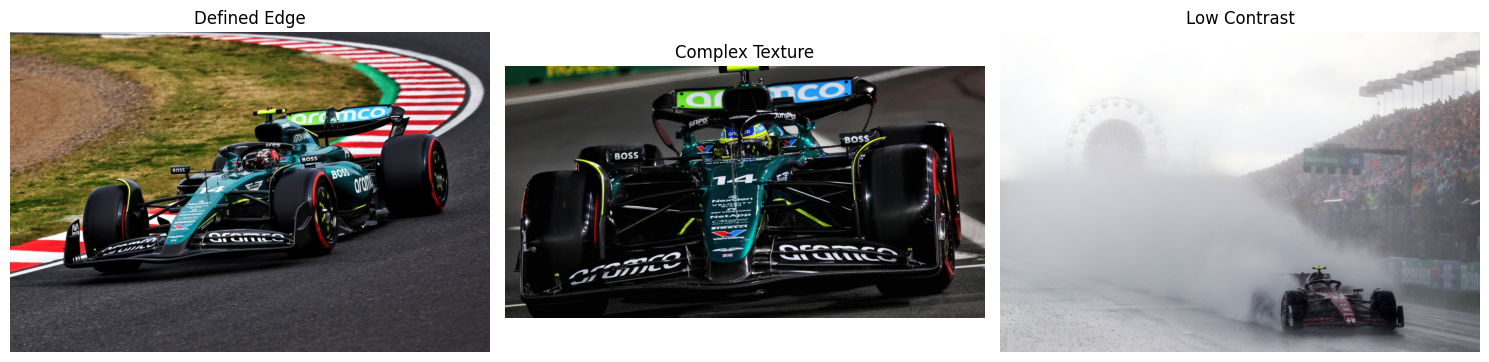

In [60]:
# show_image("Original images", orig)

show_images_row(
    ["Defined Edge", "Complex Texture", "Low Contrast"],
    [images["well_defined"], images["complex_texture"], images["low_contrast"]]
)

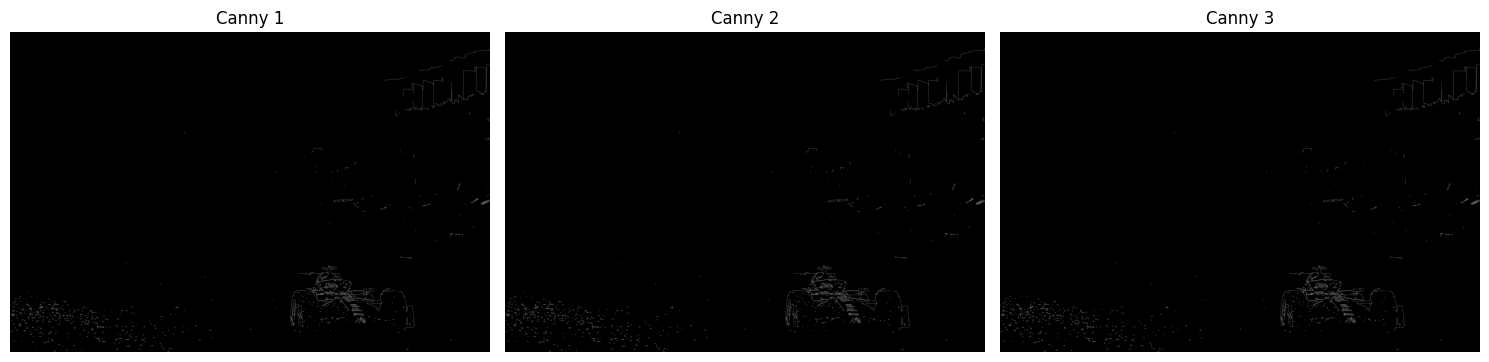

In [61]:
# show_image("Canny", edges_canny, cmap="gray")
show_images_row(
    ["Canny 1", "Canny 2", "Canny 3"],
    [edges_canny1, edges_canny2, edges_canny3],
    cmap="gray"
)

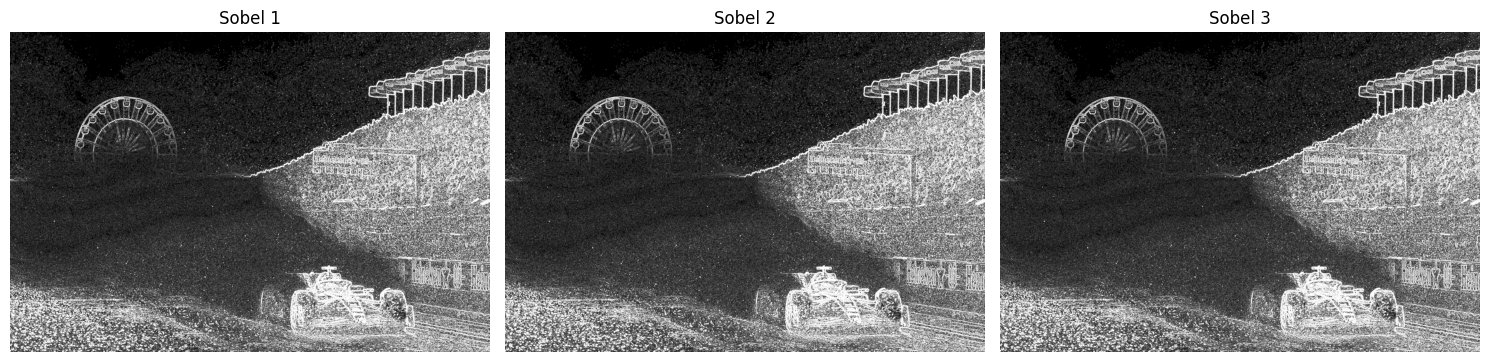

In [62]:
#show_image("Sobel", edges_sobel, cmap="gray")

show_images_row(
    ["Sobel 1", "Sobel 2", "Sobel 3"],
    [edges_sobel1, edges_sobel2, edges_sobel3],
    cmap="gray"
)

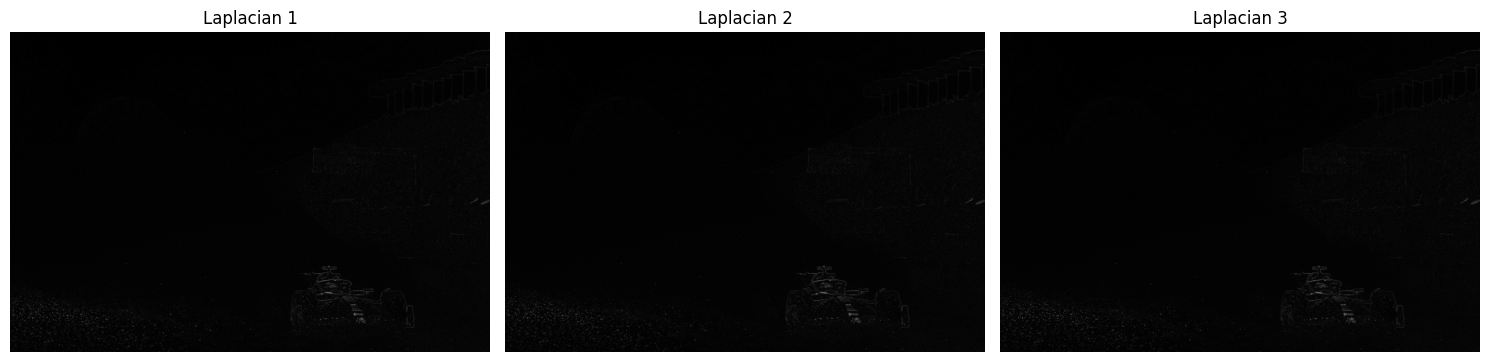

In [63]:
#show_image("Laplacian", edges_laplacian, cmap="gray")
show_images_row(
    ["Laplacian 1", "Laplacian 2", "Laplacian 3"],
    [edges_laplacian1, edges_laplacian2, edges_laplacian3],
    cmap="gray"
)